Introduction:

Welcome ttheur exploration of New York real estate dataI'mre diving into cleaning, visualizing, and predicting housing prices based on area, location, and neighborhood. Through meticulous data cleaning and compelling visualizationI'mwe aingim to uncover patterns and insights. Then, leveraging machine learningtoll build predictive models to guide decision-making in this vibrant market.

Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from glob import glob
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
import matplotlib.image as mpimg


Importing Dataset

In [8]:
filepath = "C:/Users/hp/Documents/Data Science Portfolio Subhan\Jupyter Python Projects/Project 1 - New York Real Estate with Regression/NY-House-Dataset.csv"
df = pd.read_csv(filepath)

In [9]:
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


Cleaning and Processing to make the Data Accessible

In [10]:
#Renaming and Dropping Columns 

df.rename(columns = {"BROKERTITLE":"BROKERED BY"}, inplace = True)
df.rename(columns = {"TYPE":"PROPERTY TYPE"}, inplace = True)
df.rename(columns = {"PROPERTYSQFT":"PROPERTY_BY_SQFT"}, inplace = True)
df.rename(columns = {"PROPERTYSQFT":"PROPERTY_BY_SQFT"}, inplace = True)
df.drop(columns = {"ADDRESS"}, inplace = True)
df.drop(columns = {"MAIN_ADDRESS"}, inplace = True)
df.drop(columns = {"ADMINISTRATIVE_AREA_LEVEL_2"}, inplace = True)
df.drop(columns = {"FORMATTED_ADDRESS"}, inplace = True)
df.drop(columns = {"STREET_NAME"}, inplace = True)
df.drop(columns = {"LONG_NAME"}, inplace = True)
df.drop(columns = {"STATE"}, inplace = True)

#Replacing Data in Columns

df["BROKERED BY"] = df["BROKERED BY"].str.replace("Brokered by", "")
df["PROPERTY TYPE"] = df["PROPERTY TYPE"].str.replace(" for sale", "")
df.rename(columns = {"PROPERTY TYPE": "PROPERTY FOR SALE"}, inplace = True)

# Replacing Data Types

df["PROPERTY_BY_SQFT"] = df["PROPERTY_BY_SQFT"].astype(int)
df["BATH"] = df["BATH"].round().astype(int)

df["PRICE_PER_SQFT"] = df["PRICE"] / df["PROPERTY_BY_SQFT"]
df["PRICE_PER_SQFT"] = df["PRICE_PER_SQFT"].round().astype(int)

In [11]:
df.head()

,BROKERED BY,PROPERTY FOR SALE,PRICE,BEDS,BATH,PROPERTY_BY_SQFT,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE,PRICE_PER_SQFT
0,Douglas Elliman -111 Fifth Ave,Condo,315000,2,2,1400,New York,Manhattan,40.761255,-73.974483,225
1,Serhant,Condo,195000000,7,10,17545,New York,New York County,40.766393,-73.980991,11114
2,Sowae Corp,House,260000,4,2,2015,New York,Richmond County,40.541805,-74.196109,129
3,COMPASS,Condo,69000,3,1,445,New York,New York County,40.761398,-73.974613,155
4,Sotheby's International Realty - East Side Ma...,Townhouse,55000000,7,2,14175,New York,New York County,40.767224,-73.969856,3880


Dataset Columns Order

In [65]:
df = df[["BROKERED BY", "PROPERTY FOR SALE", "PRICE", "BEDS", "PROPERTY_BY_SQFT", "LOCALITY", "SUBLOCALITY", "PRICE_PER_SQFT", "LATITUDE", "LONGITUDE"]]

Manipulating Column ["PROPERTY FOR SALE"]

In [66]:
df["PROPERTY FOR SALE"].unique()

array(['Condo', 'House', 'Townhouse', 'Co-op', 'Multi-family home',
       'For sale', 'Contingent', 'Land', 'Foreclosure', 'Pending',
       'Coming Soon', 'Mobile house', 'Condop'], dtype=object)

In [67]:
df = df[-df["PROPERTY FOR SALE"].str.contains("For sale")]
df = df[-df["PROPERTY FOR SALE"].str.contains("Foreclosure")]
df = df[-df["PROPERTY FOR SALE"].str.contains("Pending")]
df = df[-df["PROPERTY FOR SALE"].str.contains("Coming Soon")]
df = df[-df["PROPERTY FOR SALE"].str.contains("Contingent")]
df["PROPERTY FOR SALE"] = df["PROPERTY FOR SALE"].str.replace("Condop", "Condo")

Visualization Process

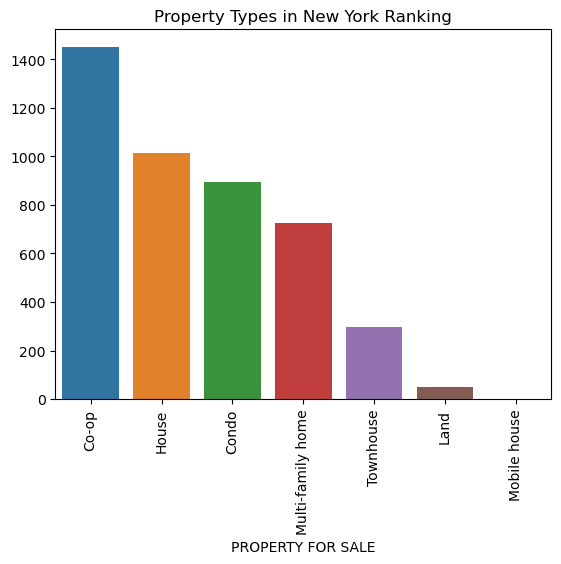

In [68]:
value_counts = df["PROPERTY FOR SALE"].value_counts()
sns.barplot(x = value_counts.index, y = value_counts.values)
plt.xticks (rotation = 90)
plt.title("Property Types in New York Ranking")
plt.show()


Finding Outliers

In [69]:
df.describe()

,PRICE,BEDS,PROPERTY_BY_SQFT,PRICE_PER_SQFT,LATITUDE,LONGITUDE
count,4.434000e+03,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000
mean,2.447437e+06,3.366486,2198.329950,841.686964,40.717181,-73.937945
std,3.261847e+07,2.662599,2446.534467,3431.935612,0.086814,0.098143
min,5.800000e+03,1.000000,250.000000,3.000000,40.499798,-74.253033
25%,4.990000e+05,2.000000,1200.000000,325.000000,40.644624,-73.984950
50%,8.450000e+05,3.000000,2184.000000,496.000000,40.729228,-73.947205
75%,1.499999e+06,4.000000,2184.000000,838.000000,40.773698,-73.868404
max,2.147484e+09,50.000000,65535.000000,214748.000000,40.912729,-73.702450


In [70]:
#value_counts = df["PROPERTY_BY_SQFT"].value_counts()
#plt.bar(x = value_counts.index, height = value_counts.values)
#plt.ticklabel_format(style='plain', axis='y')
#plt.show()

In [71]:
# Removing Outliers

low, high = df["PROPERTY_BY_SQFT"].quantile([0.1, 0.4])
mask_area = df["PROPERTY_BY_SQFT"].between (low, high)
df = df[mask_area]

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



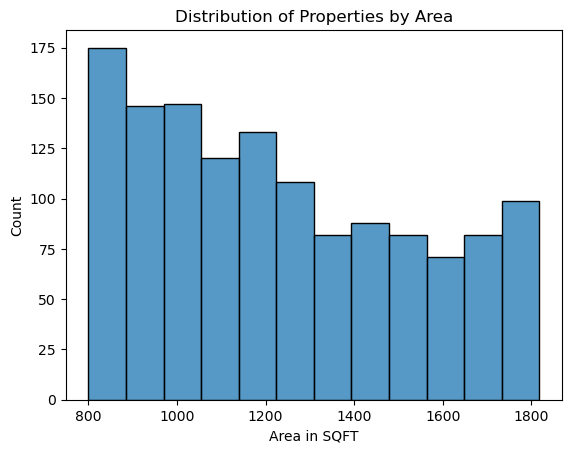

In [72]:
# Histogram

sns.histplot(df["PROPERTY_BY_SQFT"])
plt.xlabel("Area in SQFT")
plt.title("Distribution of Properties by Area");

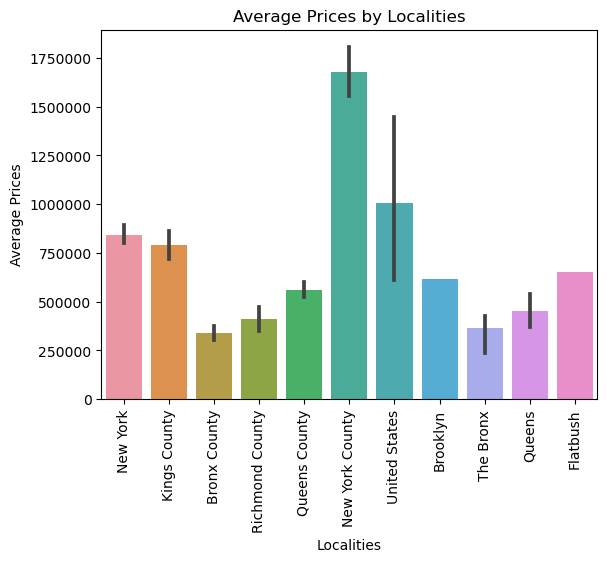

In [73]:
avg_loc_price = df.groupby("LOCALITY")["PRICE"].mean
sns.barplot (df, x = "LOCALITY", y = "PRICE")
plt.xticks(rotation = 90)
plt.xlabel("Localities")
plt.ylabel("Average Prices")
plt.ticklabel_format(style = "plain", axis = "y")
plt.title("Average Prices by Localities")
plt.show();

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



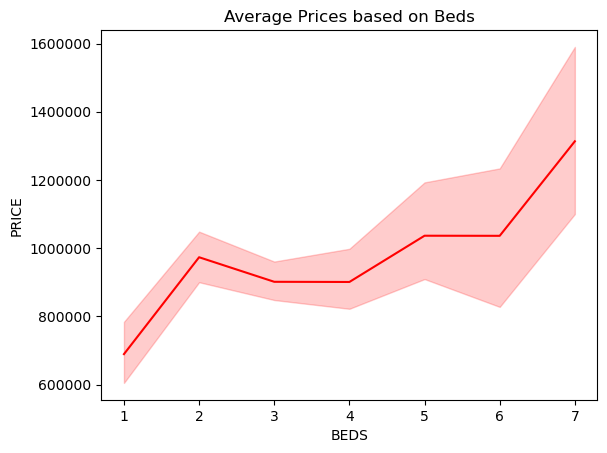

In [74]:
avg_bed = df['BEDS'].mean()
sns.lineplot(data=df, x='BEDS', y='PRICE', color="red")
plt.ticklabel_format(style="plain", axis="y")
plt.title("Average Prices based on Beds".format(avg_bed))
plt.show();

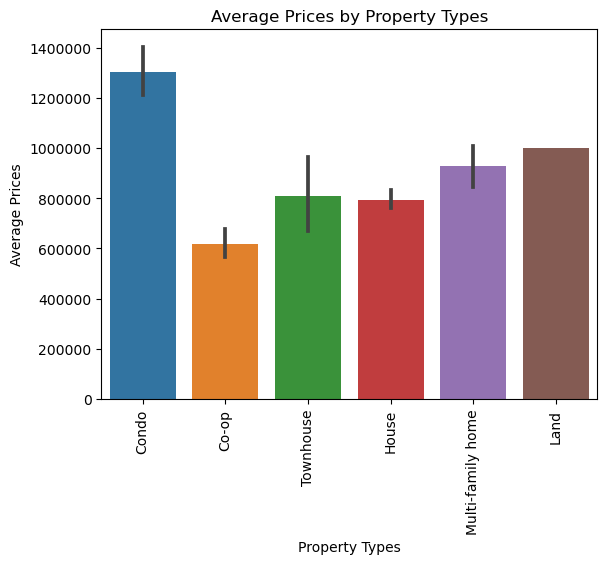

In [75]:
avg_loc_price = df.groupby("PROPERTY FOR SALE")["PRICE"].mean
sns.barplot (df, x = "PROPERTY FOR SALE", y = "PRICE")
plt.xticks(rotation = 90)
plt.xlabel("Property Types")
plt.ylabel("Average Prices")
plt.ticklabel_format(style = "plain", axis = "y")
plt.title("Average Prices by Property Types")
plt.show();

The Correlation between Area and Price is Around 0.418


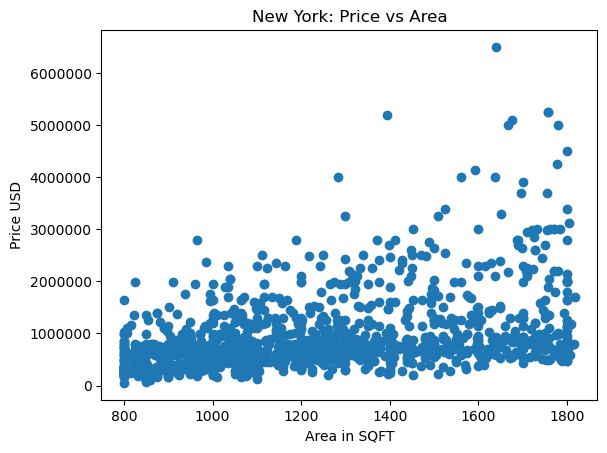

In [76]:
# Scatter Plot for Price and Area Relation

plt.scatter(x =df["PROPERTY_BY_SQFT"], y = df["PRICE"])
plt.ticklabel_format(style = "plain", axis = "y")
plt.xlabel("Area in SQFT")
plt.ylabel("Price USD")
plt.title("New York: Price vs Area");

correlation = df["PROPERTY_BY_SQFT"].corr(df["PRICE"])
print ("The Correlation between Area and Price is Around", round (correlation, 3))

Preparing Linear Model

In [77]:
features = ["PROPERTY_BY_SQFT"]
X_train = df[features]
X_train

,PROPERTY_BY_SQFT
0,1400
9,978
10,850
11,1162
15,1000
...,...
4773,840
4781,1111
4782,1729
4790,800


In [78]:
target = "PRICE"
y_train = df[target]
y_train.head()

0     315000
9     440000
10    375000
11    689000
15    549000
Name: PRICE, dtype: int64

In [79]:
y_mean = y_train.mean()
y_mean

906977.9407351838

In [80]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[906977.9407351838,
 906977.9407351838,
 906977.9407351838,
 906977.9407351838,
 906977.9407351838]

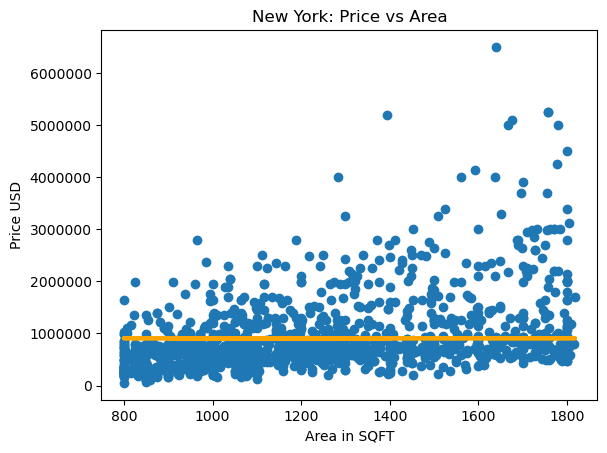

In [81]:
plt.plot(X_train.values, y_pred_baseline, color = "orange", linewidth = 3)
plt.scatter(x =df["PROPERTY_BY_SQFT"], y = df["PRICE"])
plt.ticklabel_format(style = "plain", axis = "y")
plt.xlabel("Area in SQFT")
plt.ylabel("Price USD")
plt.title("New York: Price vs Area");

In [82]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean Property Price:", round(y_mean, 2))
print("Mean Absolute Error:", round(mae_baseline, 2))

Mean Property Price: 906977.94
Mean Absolute Error: 484946.04


Creating and Training the Model

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predictions!!

In [84]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([1074431.90019215,  651231.53898986,  522867.44838822,
        835754.91922972,  673294.11706202])

In [85]:
mae_train = mean_absolute_error(y_train, y_pred_training)
print("Mean Absolute Error:", round(mae_train, 2))

Mean Absolute Error: 449861.81


In [86]:
x = df["PROPERTY_BY_SQFT"]
y = df["PRICE"]
x_reshaped = x.values.reshape(-1, 1)
y_reshaped = y.values.reshape(-1, 1)
x_train, x_test, Y_train, y_test = train_test_split(x_reshaped, y_reshaped, test_size=0.5 )
x_test[:5]

array([[1450],
       [1800],
       [ 800],
       [1330],
       [ 800]])

Test Data for Predictions

In [119]:
#y_pred_test = pd.Series(model.predict(x_test))
#y_pred_test.astype(float);

Preparing and Generate Equation

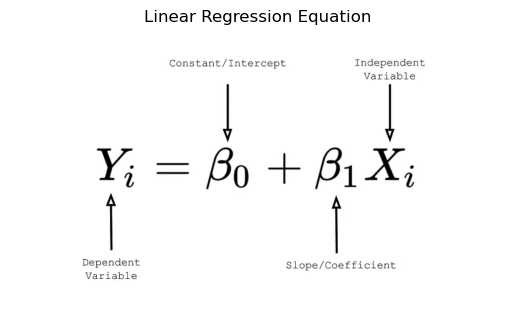

In [129]:
filepath = "C:/Users/hp/Documents/Data Science Portfolio Subhan/Jupyter Python Projects/Project 1 - New York Real Estate with Regression/EQ.webp"
img = mpimg.imread(filepath)
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title("Linear Regression Equation")
plt.show()

In [88]:
intercept = round(model.intercept_, 2)
print ("The Model Intercept is", intercept)

The Model Intercept is -329550.34


In [89]:
coefficient = round(model.coef_[0], 2)
print ("The Model Coefficient is", coefficient)

The Model Coefficient is 1002.84


In [90]:
print(f" apart price = {intercept} + {coefficient} * surface_covered")

 apart price = -329550.34 + 1002.84 * surface_covered


Linear Model Results

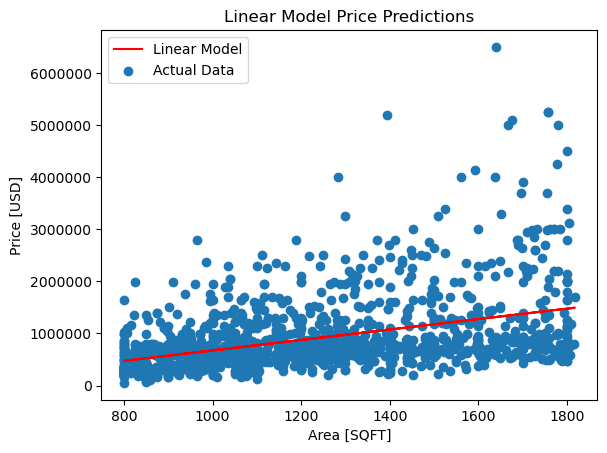

In [91]:
plt.plot(X_train.squeeze(), model.predict(X_train), color = "red", label = "Linear Model")
#plt.plot(x_test, y_pred_test, color='red', linewidth=2, label='Regression Line')
plt.scatter(X_train, y_train, label='Actual Data')
plt.xlabel("Area [SQFT]")
plt.ylabel("Price [USD]")
plt.ticklabel_format(style = "plain", axis = "y")
plt.title("Linear Model Price Predictions")
plt.legend();

Our linear regression analysis revealed a strong positive correlation between housing prices and area in New York City. The model's performance metrics underscore its effectiveness in capturing this relationship, providing valuable insights for pricing strategies and real estate decision-making.

Price vs Location Section 

As we have found the model's result with Area and Prices, now it's time to find and predict the prices based on Location, and the best way to find out, is via Geo Map Scatter.

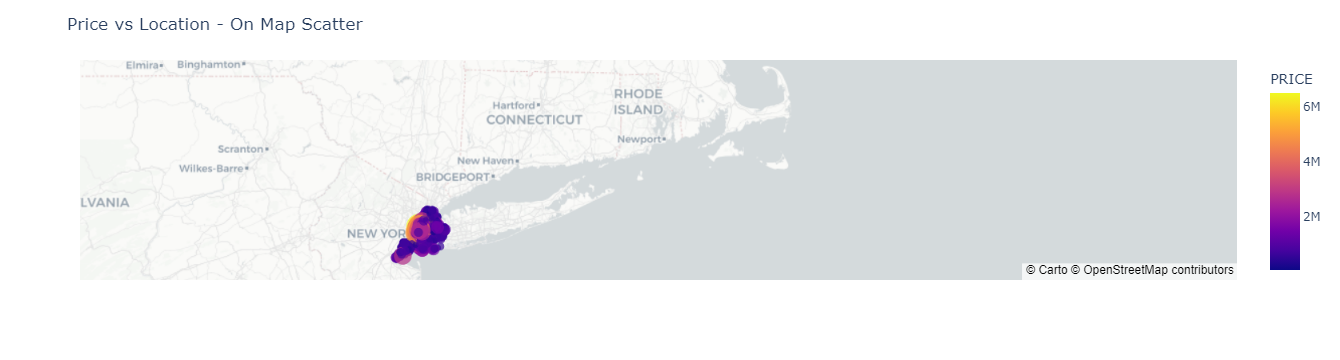

In [92]:
fig = px.scatter_mapbox(
    df,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="PRICE",
    size="PRICE",
    mapbox_style="carto-positron"
)

color_scale = px.colors.sequential.Viridis
color_range = [min(df['PRICE']), max(df['PRICE'])]
fig.update_traces(marker=dict(colorbar=dict(tickvals=color_range)))
fig.update_layout(title='Price vs Location - On Map Scatter')

fig.show()

As we see the prices ascend on various location, now to analyze it, we'll be using 3D Scatter Plot.

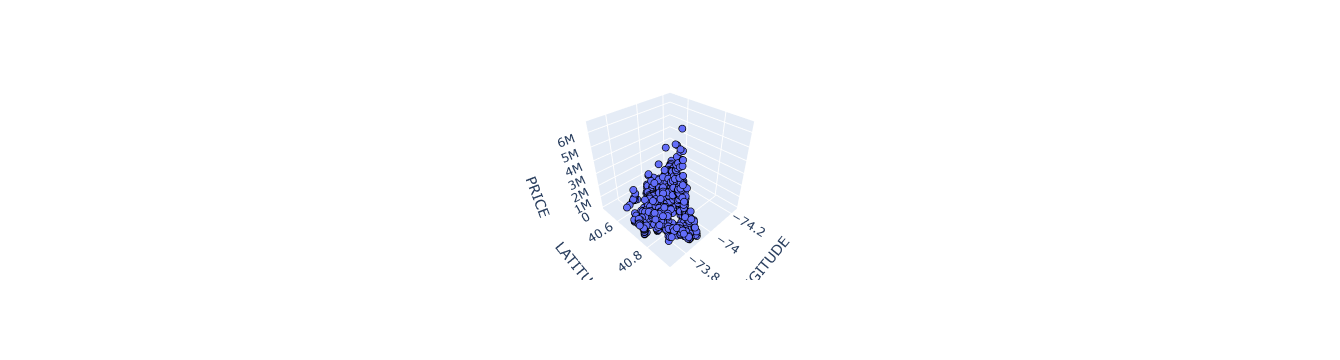

In [93]:
fig = px.scatter_3d (
    df,
    x = "LONGITUDE",
    y = "LATITUDE",
    z = "PRICE",
    labels = {"LATITUDE": "LATITUDE", "LONGITUDE": "LONGITUDE", "PRICE": "PRICE"}
)
fig.update_traces(
    marker = {"size": 4, "line":{"width": 2, "color": "DarkSlateGrey"}},
     selector={"mode": "markers"},
)
fig.show()

Let's Build our New Model with New Features

In [94]:
features = ["LONGITUDE", "LATITUDE"]
X_train = df[features]
X_train

,LONGITUDE,LATITUDE
0,-73.974483,40.761255
9,-73.969694,40.615738
10,-73.922983,40.824870
11,-74.155306,40.624996
15,-74.167163,40.540621
...,...,...
4773,-73.877318,40.665689
4781,-73.960909,40.720853
4782,-73.985037,40.733031
4790,-74.000594,40.717926


In [95]:
target = "PRICE"
y_train = df[target]
y_train

0        315000
9        440000
10       375000
11       689000
15       549000
         ...   
4773     569000
4781    2500000
4782    2600000
4790     789000
4794     945000
Name: PRICE, Length: 1333, dtype: int64

In [96]:
y_mean = y_train.mean()
y_mean

906977.9407351838

In [97]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[906977.9407351838,
 906977.9407351838,
 906977.9407351838,
 906977.9407351838,
 906977.9407351838]

In [98]:
mae = mean_absolute_error(y_train, y_pred_baseline)
print ("Mean Absolute Error:", mae)
print ("Baseline Mean:", y_mean)

Mean Absolute Error: 484946.0369015734
Baseline Mean: 906977.9407351838


In [99]:
model = LinearRegression()
model

LinearRegression()

In [100]:
model.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred_training = model.predict(X_train)
y_pred_training

array([1032686.52879986,  793089.45006105, 1047739.43871176, ...,
       1005430.82568675, 1007427.8630541 , 1066664.01966411])

In [102]:
training_mae = mean_absolute_error(y_train, y_pred_training).round(2)
training_mae

479838.91

In [103]:
intercept = model.intercept_.round(0)
coefficients = model.coef_.round(0)

In [104]:
print(
f' Price = {intercept} + {coefficients} * Latitude + {coefficient} * Longitude'
)

 Price = -187633803.0 + [-1673512.  1591445.] * Latitude + 1002.84 * Longitude


The Results!

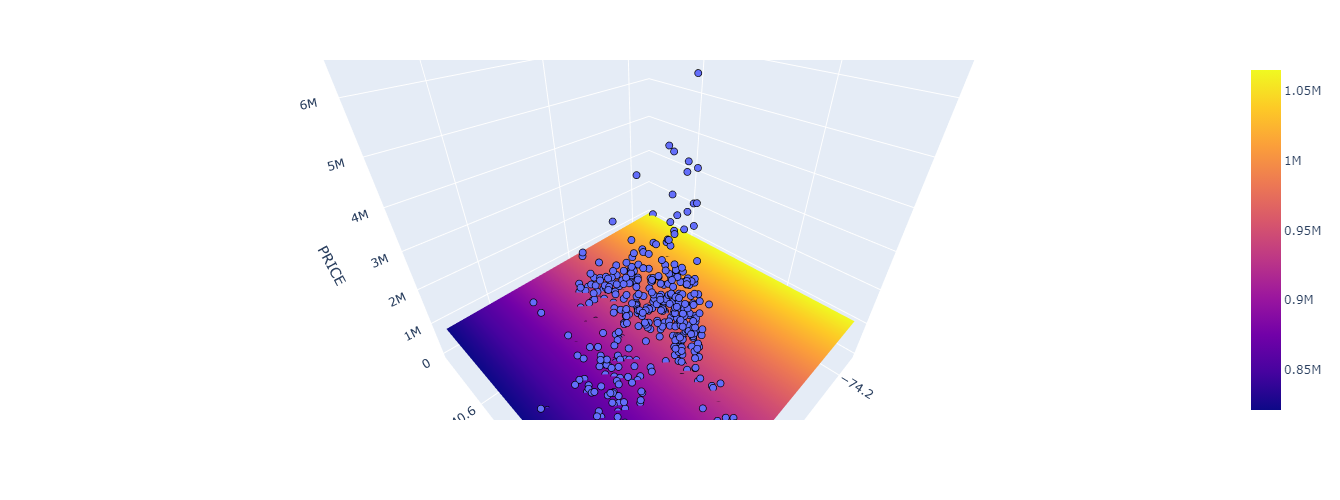

In [105]:
fig = px.scatter_3d(
    df,
    x="LONGITUDE",
    y="LATITUDE",
    z="PRICE",
    labels={"LONGITUDE": "LONGITUDE", "LATITUDE": "LATITUDE", "PRICE": "PRICE"},
    width=600,
    height=500,
)

# Create x and y coordinates for model representation
x_plane = np.linspace(df["LONGITUDE"].min(), df["LONGITUDE"].max(), 10)
y_plane = np.linspace(df["LATITUDE"].min(), df["LATITUDE"].max(), 10)
xx, yy = np.meshgrid(x_plane, y_plane)

z_plane = model.predict(pd.DataFrame({"LONGITUDE": x_plane, "LATITUDE": y_plane}))
zz = np.tile(z_plane, (10, 1))

fig.add_trace(go.Surface(x=xx, y=yy, z=zz))

fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

fig.show()

Now, we have calculated the Prices over Latitude and Longitude, but as we see, the results are quite hard to understand. So to go in depth, we'll be looking to analyze Prices with Sublocalities in New York

Price vs Sublocalities in New York

In [106]:
features = ["SUBLOCALITY"]
X_train = df[features]
target = "PRICE"
y_train = df[target]

In [107]:
df.head()

,BROKERED BY,PROPERTY FOR SALE,PRICE,BEDS,PROPERTY_BY_SQFT,LOCALITY,SUBLOCALITY,PRICE_PER_SQFT,LATITUDE,LONGITUDE
0,Douglas Elliman -111 Fifth Ave,Condo,315000,2,1400,New York,Manhattan,225,40.761255,-73.974483
9,CENTURY 21 MK Realty,Co-op,440000,2,978,Kings County,Brooklyn,450,40.615738,-73.969694
10,Engel & Volkers Americas,Co-op,375000,2,850,Bronx County,The Bronx,441,40.824870,-73.922983
11,Re/Max Edge,Townhouse,689000,3,1162,New York,Richmond County,593,40.624996,-74.155306
15,Awaye Realty,Condo,549000,2,1000,Richmond County,Staten Island,549,40.540621,-74.167163


In [108]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_pred_baseline)

In [109]:
mae = mean_absolute_error(y_train, y_pred_baseline)
mae

484946.0369015734

As we have Categorical data in the column [SUBLOCALITY], then we'll be using Ridge Regression Algorithm for this problem. And also OneHotEncoder is here to help us go further.

In [110]:
ohe = OneHotEncoder(use_cat_names = True)
ohe.fit(X_train)
XT_train = ohe.transform(X_train)

In [111]:
model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    Ridge()
)
model

Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('ridge', Ridge())])

In [113]:
model.fit(XT_train, y_train)
y_pred_test = model.predict(XT_train)
mae_training = mean_absolute_error(y_train, y_pred_test)
mae_training

359281.1967230667

In [114]:
coef = model.named_steps["ridge"].coef_.round(2)
intercept = model.named_steps["ridge"].intercept_.round(2)

print ("Model Coef is:", coef)
print ("Model Intercept is:", intercept)

Model Coef is: [1547526.22 -129989.68 -575440.44 -276653.15 -492583.71  -32449.69
 -357072.02  718216.13   52063.6   890251.35 -327352.24 -152693.04
 -417039.56 -311590.72 -135193.04]
Model Intercept is: 920386.08


In [115]:
feature_names = model.named_steps["onehotencoder"].get_feature_names_out()
feature_names

array(['SUBLOCALITY_Manhattan', 'SUBLOCALITY_Brooklyn',
       'SUBLOCALITY_The Bronx', 'SUBLOCALITY_Richmond County',
       'SUBLOCALITY_Staten Island', 'SUBLOCALITY_Queens County',
       'SUBLOCALITY_Queens', 'SUBLOCALITY_New York',
       'SUBLOCALITY_Kings County', 'SUBLOCALITY_New York County',
       'SUBLOCALITY_Bronx County', 'SUBLOCALITY_Coney Island',
       'SUBLOCALITY_Riverdale', 'SUBLOCALITY_Flushing',
       'SUBLOCALITY_Snyder Avenue'], dtype=object)

In [116]:
feat_imp = pd.Series(coef, index = feature_names)
feat_imp

SUBLOCALITY_Manhattan          1547526.22
SUBLOCALITY_Brooklyn           -129989.68
SUBLOCALITY_The Bronx          -575440.44
SUBLOCALITY_Richmond County    -276653.15
SUBLOCALITY_Staten Island      -492583.71
SUBLOCALITY_Queens County       -32449.69
SUBLOCALITY_Queens             -357072.02
SUBLOCALITY_New York            718216.13
SUBLOCALITY_Kings County         52063.60
SUBLOCALITY_New York County     890251.35
SUBLOCALITY_Bronx County       -327352.24
SUBLOCALITY_Coney Island       -152693.04
SUBLOCALITY_Riverdale          -417039.56
SUBLOCALITY_Flushing           -311590.72
SUBLOCALITY_Snyder Avenue      -135193.04
dtype: float64

In [117]:
print(f"price = {intercept.round(2)}")
for f, c in feat_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

price = 920386.08
+ (1547526.22 * SUBLOCALITY_Manhattan)
+ (-129989.68 * SUBLOCALITY_Brooklyn)
+ (-575440.44 * SUBLOCALITY_The Bronx)
+ (-276653.15 * SUBLOCALITY_Richmond County)
+ (-492583.71 * SUBLOCALITY_Staten Island)
+ (-32449.69 * SUBLOCALITY_Queens County)
+ (-357072.02 * SUBLOCALITY_Queens)
+ (718216.13 * SUBLOCALITY_New York)
+ (52063.6 * SUBLOCALITY_Kings County)
+ (890251.35 * SUBLOCALITY_New York County)
+ (-327352.24 * SUBLOCALITY_Bronx County)
+ (-152693.04 * SUBLOCALITY_Coney Island)
+ (-417039.56 * SUBLOCALITY_Riverdale)
+ (-311590.72 * SUBLOCALITY_Flushing)
+ (-135193.04 * SUBLOCALITY_Snyder Avenue)


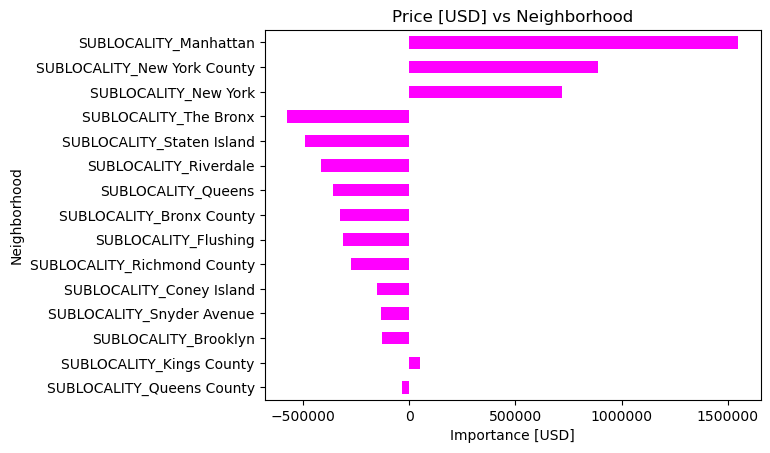

In [118]:
feat_imp.sort_values(key = abs).tail(15).plot(kind = "barh", color = "magenta")
plt.ticklabel_format(style = "plain", axis = "x")
plt.xlabel("Importance [USD]")
plt.ylabel("Neighborhood")
plt.title("Price [USD] vs Neighborhood");

Conclusion:

In completing this project, I've demonstrated a robust proficiency in data cleaning, visualization, and predictive modeling within the realm of New York City real estate. By meticulously analyzing various sections and employing multiple models, I've showcased my ability to derive actionable insights and inform strategic decision-making in the real estate industry. This project exemplifies my expertise and commitment to delivering impactful data-driven solutions, positioning me as a valuable asset in any data science or real estate context.

